In [1]:
import graph_tool as gt

# application to crime network

In [2]:
crime_facet_list = []
with open("../scm/datasets/crime_facet_list.txt", 'r') as f:
    for l in f:
        crime_facet_list.append([int(x) for x in l.strip().split()])

In [3]:
import numpy as np 
MCS = np.max(list(map(len, crime_facet_list)))
print('Maximum hedge size:', MCS)

Maximum hedge size: 25


In [4]:
import networkx as nx
from itertools import combinations
edges = []
G = nx.Graph()
for crime in crime_facet_list:
    for c, cc in combinations(crime,2):
        edges.append((c,cc))
G.add_edges_from(edges)

In [5]:
nx.write_graphml(G, './crime_network.graphml')

g = gt.Graph()
g.load('./crime_network.graphml')

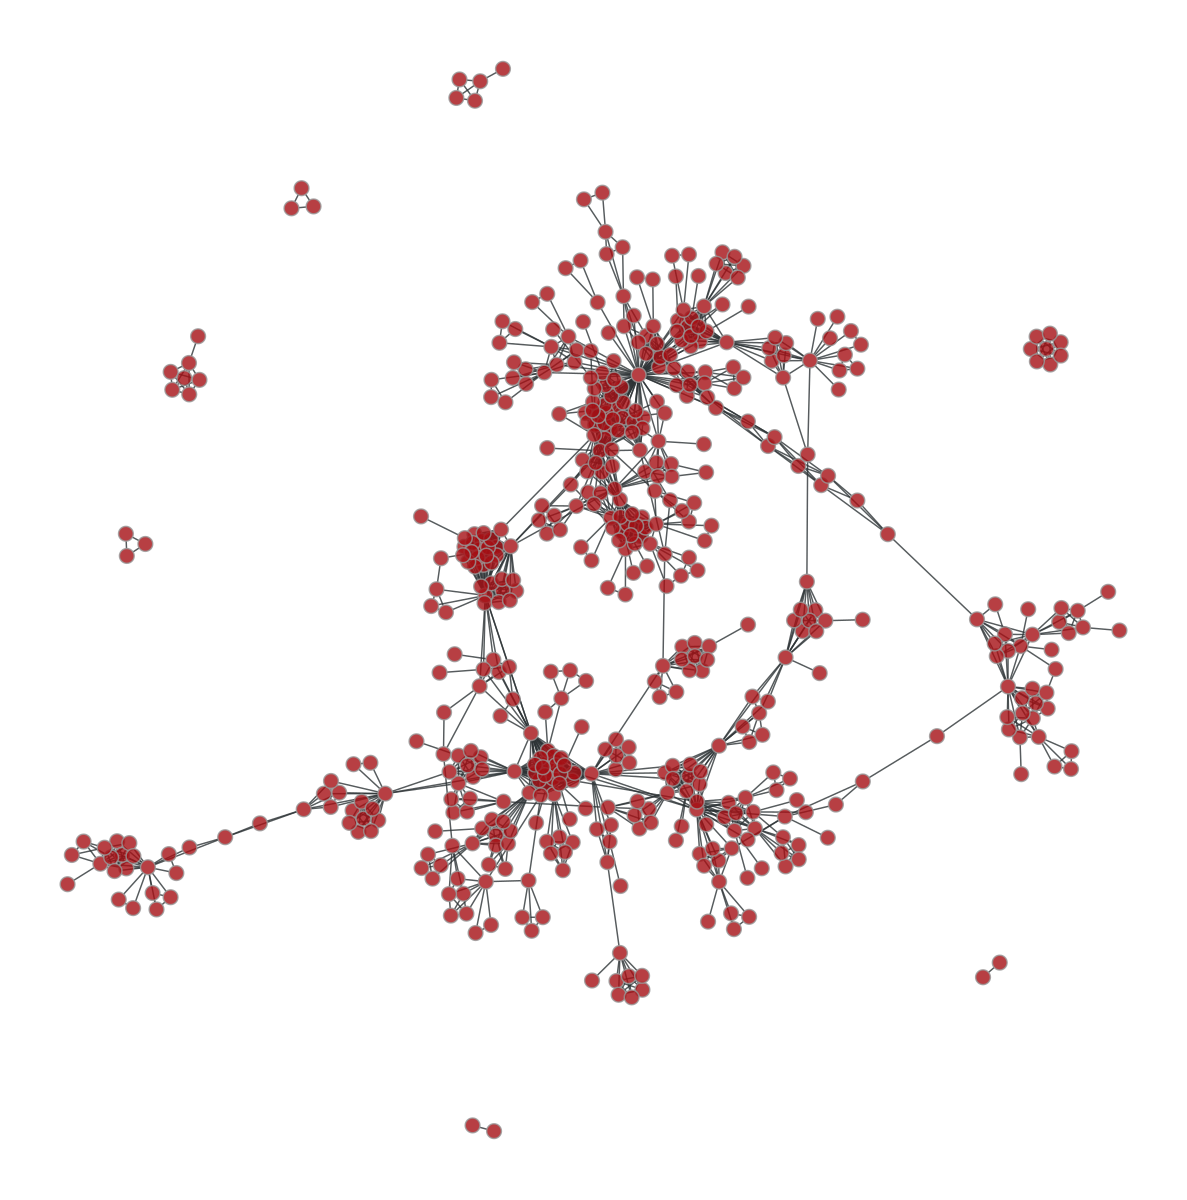

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x109f64400, at 0x15701d370>

In [6]:
from graph_tool.all import * 
graph_tool.draw.graph_draw(g)

In [7]:
CG = nx.clique.find_cliques_recursive(G)
max_cliques = list(CG)
len(max_cliques)

184

In [8]:
from graph_tool.inference.clique_decomposition import CliqueState

state = CliqueState(g)
state.mcmc_sweep(niter=10000)

(-136.33316805046064, 6)

In [9]:
hyperedges = []
for v in state.f.vertices():      # iterate through factor graph
    if state.is_fac[v]:
        continue                  # skip over factors
    if state.x[v] > 0:
         hyperedges.append(state.c[v])


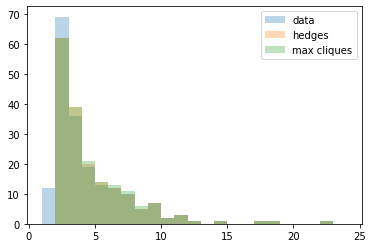

In [10]:
len(hyperedges), len(crime_facet_list)
import matplotlib.pyplot as plt
bins = range(1, np.min([MCS,100]))
res = {'data': list(map(len, crime_facet_list)), 
      'hedges': list(map(len, hyperedges)),
      'max cliques': list(map(len, max_cliques))}
for k in res:
    plt.hist(res[k], bins, label=k, alpha=.3)
plt.legend()

In [11]:
from scipy.spatial.distance import jensenshannon
dists = {}
for k in res:
    dists[k] = np.histogram(res[k], bins, density=True)[0];

for k,kk in combinations(dists.keys(),2):
    print('JS distance: ', k, kk, jensenshannon(dists[k], dists[kk]))

JS distance:  data hedges 0.1509347922949118
JS distance:  data max cliques 0.15201957932901863
JS distance:  hedges max cliques 0.014815649355237437


# pollinator network

In [12]:
pollinator_facet_list = []
with open("../scm/datasets/pollinators_facet_list.txt", 'r') as f: 
        for l in f:
            pollinator_facet_list.append([int(x) for x in l.strip().split()])

In [13]:
import numpy as np 
MCS = np.max(list(map(len, pollinator_facet_list)))
print('Maximum hedge size:', MCS)

Maximum hedge size: 189


In [14]:
import networkx as nx
from itertools import combinations
edges = []
G = nx.Graph()
for crime in pollinator_facet_list:
    for c, cc in combinations(crime,2):
        edges.append((c,cc))
G.add_edges_from(edges)

In [15]:
nx.write_graphml(G, './pollinator_network.graphml')
g = gt.Graph()
g.load('./pollinator_network.graphml')

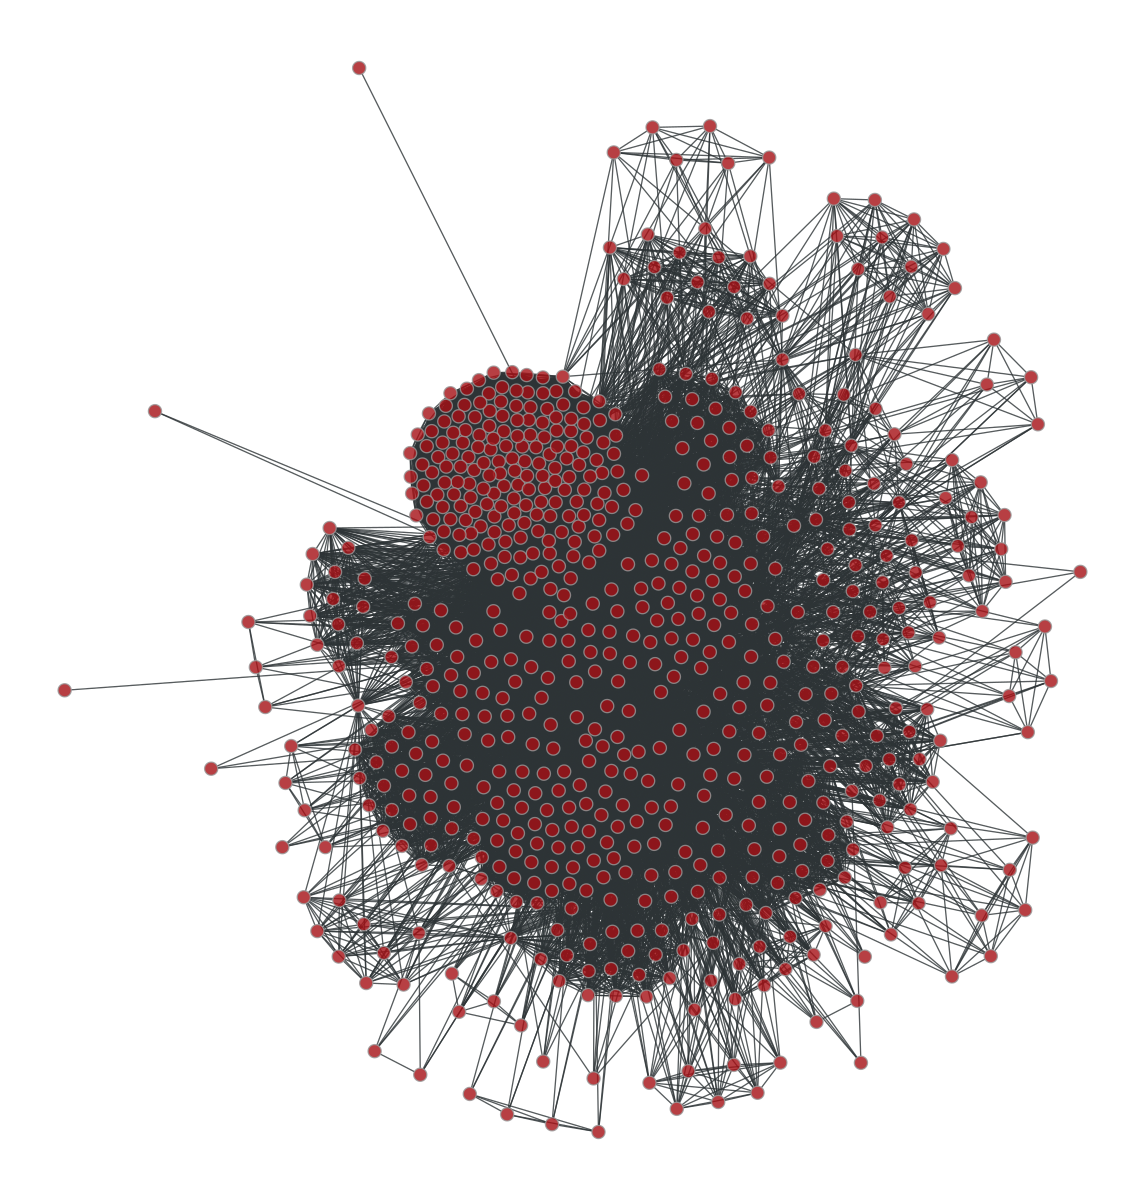

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x16f24b820, at 0x16f2ee1c0>

In [16]:
graph_tool.draw.graph_draw(g)

In [17]:
CG = nx.clique.find_cliques_recursive(G)
max_cliques = list(CG)
len(max_cliques)

1570

In [18]:
from graph_tool.inference.clique_decomposition import CliqueState

state = CliqueState(g)
state.mcmc_sweep(niter=10000)

(-109397.61241731487, 1513)

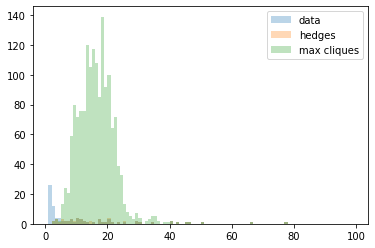

In [19]:
hyperedges = []
for v in state.f.vertices():      # iterate through factor graph
    if state.is_fac[v]:
        continue                  # skip over factors
    if state.x[v] > 0:
         hyperedges.append(state.c[v])

import matplotlib.pyplot as plt
bins = range(1, np.min([MCS,100]))
res = {'data': list(map(len, pollinator_facet_list)), 
      'hedges': list(map(len, hyperedges)),
      'max cliques': list(map(len, max_cliques))}
for k in res:
    plt.hist(res[k], bins, label=k, alpha=.3)
plt.legend()



In [20]:
from scipy.spatial.distance import jensenshannon
dists = {}

for k in res:
    dists[k] = np.histogram(res[k], bins, density=True)[0];

for k,kk in combinations(dists.keys(),2):
    print('JS distance: ', k, kk, jensenshannon(dists[k], dists[kk]))

JS distance:  data hedges 0.3987431712281475
JS distance:  data max cliques 0.5905877590253594
JS distance:  hedges max cliques 0.4483073966990127
